<a href="https://colab.research.google.com/github/noorazra23/Data-Analytics-projects/blob/main/Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fraud Detection System for Financial Security**: Project for ABC Bank
The objective of this project is to design a fraud detection system that effectively identifies and flags suspicious transactions for ABC Bank. By implementing an accurate and robust fraud detection system, the bank aims to minimize financial losses, maintain trust with customers, and ensure the security of transactions.



In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
data = pd.read_excel('/content/Fraud Alert.xlsx')

In [9]:
# Data Exploration and Preprocessing
# Assume 'Transaction_ID', 'Customer_ID', and 'Time_of_Day' are not relevant for fraud detection
data = data.drop(['Transaction_ID', 'Customer_ID', 'Time_of_Day'], axis=1)

In [10]:
# Handling missing values (if any)
data = data.dropna()

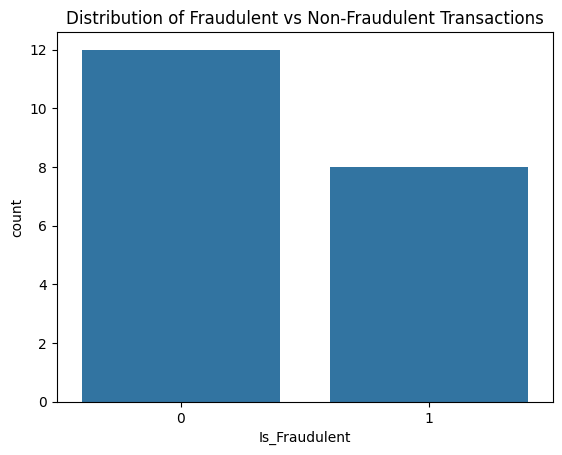

In [11]:
# Explore and visualize the data
sns.countplot(x='Is_Fraudulent', data=data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [12]:
# Feature Selection and Engineering
# 'Transaction_Amount' is a relevant feature
X = data[['Transaction_Amount']]

In [15]:
# Model Selection and Training
y = data['Is_Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

#  the model using Isolation Forest
model = make_pipeline(StandardScaler(), IsolationForest(contamination=0.01, random_state=42))
model.fit(X_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('isolationforest',
                 IsolationForest(contamination=0.01, random_state=42))])

In [18]:
# Real-time Monitoring and Alert Mechanisms
def real_time_monitoring(new_transaction_amount):
    new_transaction = pd.DataFrame({'Transaction_Amount': [new_transaction_amount]})
    prediction = model.predict(new_transaction)

    if prediction[0] == -1:
        print("ALERT: Potential fraudulent activity detected!")

    plt.figure(figsize=(8, 6))

    # Plot the new transaction amount
    plt.scatter([0], [new_transaction_amount], color='blue', label='New Transaction Amount')

    if prediction[0] == -1:
        plt.scatter([0], [new_transaction_amount], color='red', marker='x', label='Potential Fraudulent Activity')
        print("ALERT: Potential fraudulent activity detected!")

    plt.title('Real-time Monitoring and Alert')
    plt.xlabel('Transaction')
    plt.ylabel('Transaction Amount')
    plt.legend()
    plt.show()

ALERT: Potential fraudulent activity detected!
ALERT: Potential fraudulent activity detected!


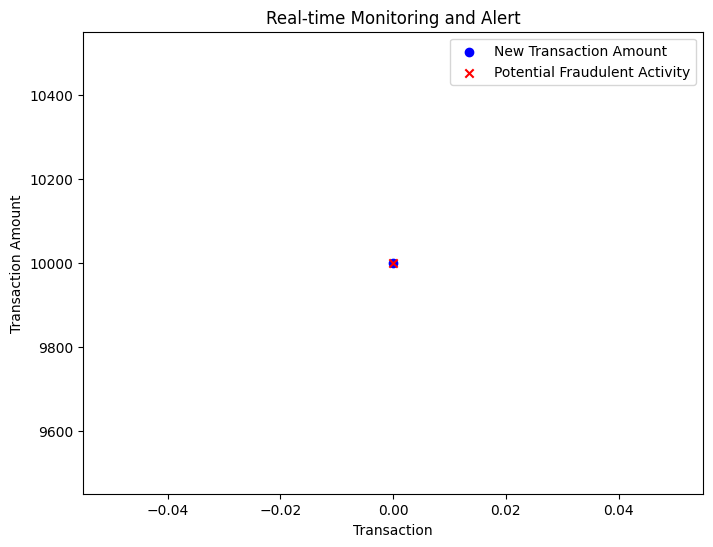

In [19]:
# usage of real-time monitoring of fraudulent detected
new_transaction_amount = 10000
real_time_monitoring(new_transaction_amount)

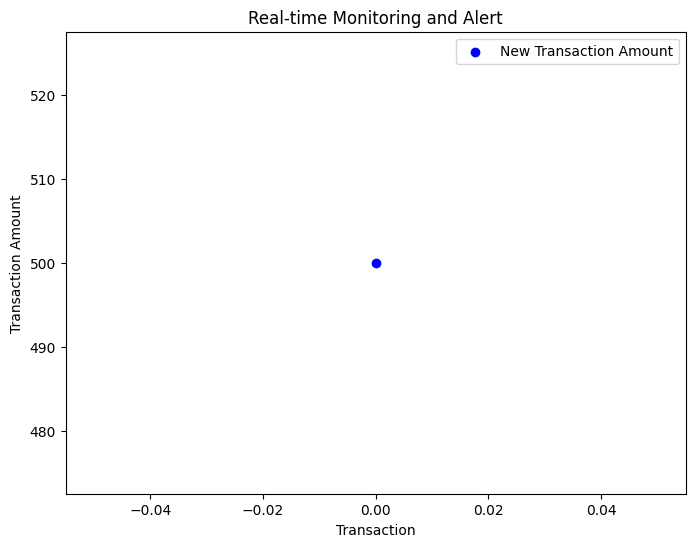

In [20]:
# usage of real-time monitoring of fraudulent not detected
new_transaction_amount = 500
real_time_monitoring(new_transaction_amount)

In [21]:
# Model Evaluation
predictions = model.predict(X_test)
predictions[predictions == 1] = 0
predictions[predictions == -1] = 1


In [22]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix')

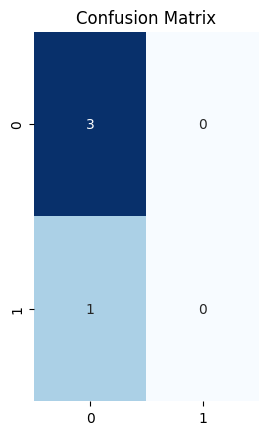

In [23]:
# Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')

In [24]:
plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

In [27]:
print("\nClassification Report:")
print(classification_report(y_test, predictions, zero_division=1))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.88      0.50      0.43         4
weighted avg       0.81      0.75      0.64         4



**Conclusion **The final output of this project would be a fraud detection system for ABC Bank. It includes a deployed system capable of real-time monitoring and analysis of transactions, with alerts triggered for potential fraudulent activities. The system would be evaluated based on performance metrics and a detailed report summarizing the project approach, methodologies, key findings, and recommendations for further enhancements would also be provided.

